In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping

def preprocess_data(data):
    # Unpack data
    X_train_valid = data['X_train_valid']
    y_train_valid = data['y_train_valid']
    X_test = data['X_test']
    y_test = data['y_test']

    # One-hot Encoding for y data
    encoder = LabelBinarizer()
    y_train_valid = encoder.fit_transform(y_train_valid)
    y_test = encoder.fit_transform(y_test)

    # Splitting training and validation data
    X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

    total_y_train = y_train
    total_y_val = y_val
    total_y_test = y_test

    # Trim
    X_train = X_train[:,:,0:800]
    X_val = X_val[:,:,0:800]
    X_test = X_test[:,:,0:800]

    # Maxpooling
    total_X_train = np.max(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    total_X_val = np.max(X_val.reshape(X_val.shape[0], X_val.shape[1], -1, 4), axis=3)
    total_X_test = np.max(X_test.reshape(X_test.shape[0], X_test.shape[1], -1, 4), axis=3)

    # Validation and Test Data augmentation stops here (reshaping purposes)
    # Averaging and Subsampling below only apply to Training Data

    # Average every 4 time dumps
    X_train_average = np.mean(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    X_train_average += np.random.normal(0.0, 0.5, X_train_average.shape)
    total_X_train = np.vstack((total_X_train, X_train_average))
    total_y_train = np.vstack((total_y_train, y_train))

    # Subsample every 4 time-dumps
    for i in range(0, 4):
        X_train_subsample = X_train[:, :, i::4] + np.random.normal(0.0, 0.5, X_train[:, :,i::4].shape)
        total_X_train = np.vstack((total_X_train, X_train_subsample))
        total_y_train = np.vstack((total_y_train, y_train))

    return {'total_X_train': total_X_train, 'total_X_test': total_X_test,
            'total_X_val': total_X_val, 'total_y_val': total_y_val,
            'total_y_train': total_y_train, 'total_y_test': total_y_test}

(2115, 22, 1000)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 22)            4862      
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 22)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 22)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 22)            4862      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 22)             0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 22)             0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 22ms/step - loss: 27.0327 - accuracy: 0.2666 - val_loss: 5.0151 - val_accuracy: 0.3239
Epoch 2/150
16/16 [==============================] - 0s 15ms/step - loss: 13.2300 - accuracy: 0.2766 - val_loss: 3.3748 - val_accuracy: 0.3617
Epoch 3/150
16/16 [==============================] - 0s 18ms/step - loss: 9.0633 - accuracy: 0.2759 - val_loss: 2.7770 - val_accuracy: 0.3830
Epoch 4/150
16/16 [==============================] - 0s 27ms/step - loss: 6.8923 - accuracy: 0.2975 - val_loss: 2.5822 - val_accuracy: 0.3830
Epoch 5/150
16/16 [==============================] - 0s 22ms/step - loss: 5.5972 - accuracy: 0.3014 - val_loss: 2.4276 - val_accuracy: 0.3948
Epoch 6/150
16/16 [==============================] - 0s 16ms/step - loss: 4.8431 - accuracy: 0.3058 - val_loss: 2.3200 - val_accuracy: 0.4161
Epoch 7/150
16/16 [==============================] - 0s 18ms/step - loss: 4.2596 - accuracy: 0.2983 - val_loss: 2.2751 - val_accuracy: 0.4019
Epoch 8/150
16/1

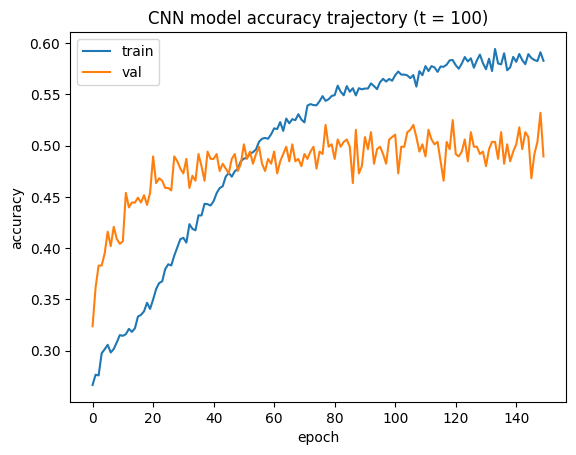

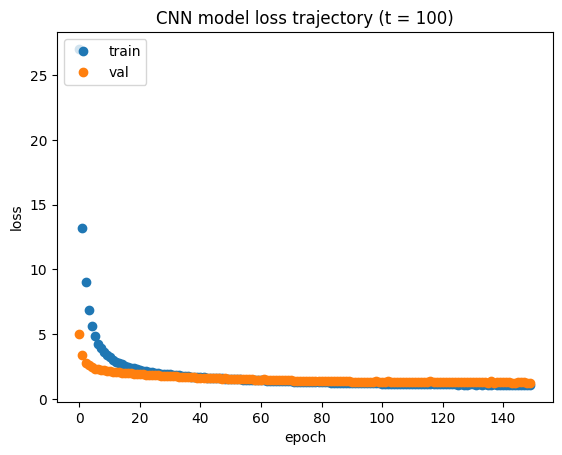

Test accuracy of the CNN model: 0.5259593725204468
(2115, 22, 1000)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 50, 22)            4862      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 25, 22)            0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 25, 22)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 25, 22)            4862      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 12, 22)            0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 26ms/step - loss: 33.9196 - accuracy: 0.2622 - val_loss: 5.5716 - val_accuracy: 0.3522
Epoch 2/150
16/16 [==============================] - 0s 21ms/step - loss: 15.8003 - accuracy: 0.2842 - val_loss: 3.8729 - val_accuracy: 0.3830
Epoch 3/150
16/16 [==============================] - 0s 20ms/step - loss: 10.4927 - accuracy: 0.2974 - val_loss: 3.0619 - val_accuracy: 0.4161
Epoch 4/150
16/16 [==============================] - 0s 23ms/step - loss: 7.9031 - accuracy: 0.3046 - val_loss: 2.7679 - val_accuracy: 0.4090
Epoch 5/150
16/16 [==============================] - 0s 21ms/step - loss: 6.5060 - accuracy: 0.3121 - val_loss: 2.6591 - val_accuracy: 0.4043
Epoch 6/150
16/16 [==============================] - 0s 24ms/step - loss: 5.6195 - accuracy: 0.3192 - val_loss: 2.4380 - val_accuracy: 0.4350
Epoch 7/150
16/16 [==============================] - 0s 22ms/step - loss: 4.9849 - accuracy: 0.3234 - val_loss: 2.3411 - val_accuracy: 0.4492
Epoch 8/150
16/

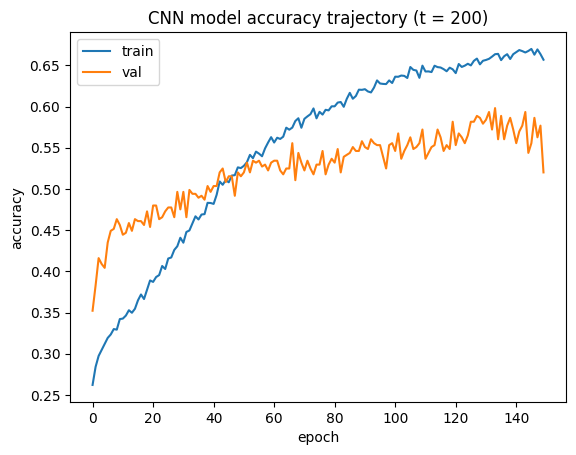

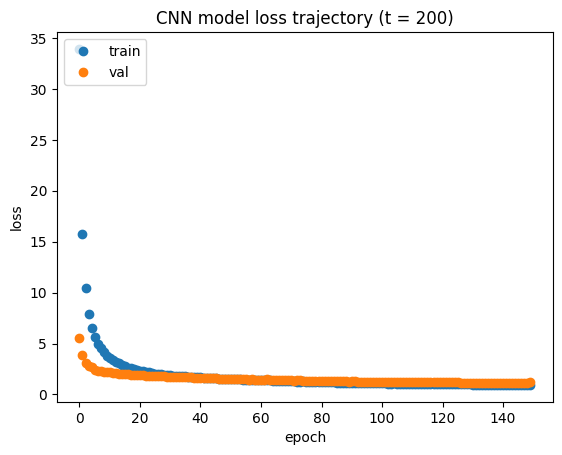

Test accuracy of the CNN model: 0.6027088165283203
(2115, 22, 1000)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 75, 22)            4862      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 37, 22)            0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 37, 22)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 37, 22)            4862      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 18, 22)            0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 18, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 31ms/step - loss: 32.5257 - accuracy: 0.2672 - val_loss: 5.8713 - val_accuracy: 0.3215
Epoch 2/150
16/16 [==============================] - 0s 29ms/step - loss: 15.0472 - accuracy: 0.2851 - val_loss: 3.7888 - val_accuracy: 0.4113
Epoch 3/150
16/16 [==============================] - 1s 36ms/step - loss: 10.1410 - accuracy: 0.3083 - val_loss: 3.4676 - val_accuracy: 0.4043
Epoch 4/150
16/16 [==============================] - 0s 30ms/step - loss: 7.5991 - accuracy: 0.3220 - val_loss: 2.9614 - val_accuracy: 0.4279
Epoch 5/150
16/16 [==============================] - 0s 23ms/step - loss: 6.2296 - accuracy: 0.3366 - val_loss: 2.7345 - val_accuracy: 0.4444
Epoch 6/150
16/16 [==============================] - 0s 28ms/step - loss: 5.4964 - accuracy: 0.3393 - val_loss: 2.6270 - val_accuracy: 0.4563
Epoch 7/150
16/16 [==============================] - 0s 30ms/step - loss: 4.8401 - accuracy: 0.3520 - val_loss: 2.4197 - val_accuracy: 0.4704
Epoch 8/150
16/

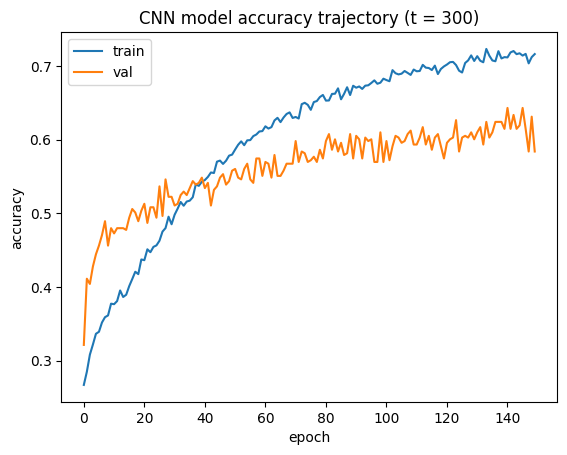

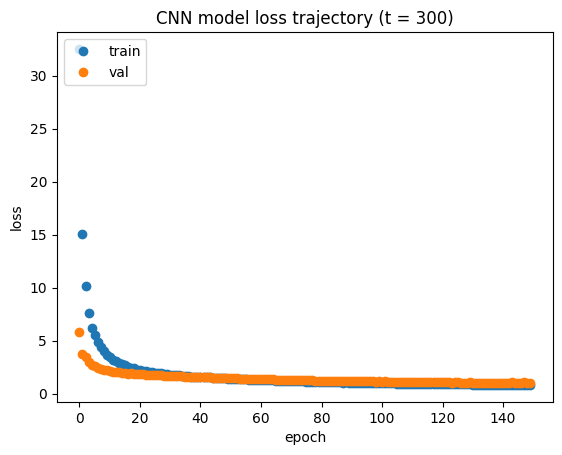

Test accuracy of the CNN model: 0.6636568903923035
(2115, 22, 1000)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 100, 22)           4862      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 50, 22)            0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 50, 22)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 50, 22)            4862      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 25, 22)            0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 25, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 48ms/step - loss: 37.8752 - accuracy: 0.2710 - val_loss: 7.1496 - val_accuracy: 0.2671
Epoch 2/150
16/16 [==============================] - 0s 30ms/step - loss: 17.1400 - accuracy: 0.2903 - val_loss: 4.4951 - val_accuracy: 0.3830
Epoch 3/150
16/16 [==============================] - 0s 30ms/step - loss: 11.6328 - accuracy: 0.3094 - val_loss: 3.4742 - val_accuracy: 0.3972
Epoch 4/150
16/16 [==============================] - 1s 34ms/step - loss: 9.0331 - accuracy: 0.3245 - val_loss: 3.0673 - val_accuracy: 0.4161
Epoch 5/150
16/16 [==============================] - 1s 36ms/step - loss: 7.2935 - accuracy: 0.3343 - val_loss: 2.8053 - val_accuracy: 0.4634
Epoch 6/150
16/16 [==============================] - 1s 35ms/step - loss: 6.2175 - accuracy: 0.3499 - val_loss: 2.7072 - val_accuracy: 0.4657
Epoch 7/150
16/16 [==============================] - 0s 31ms/step - loss: 5.3834 - accuracy: 0.3708 - val_loss: 2.5893 - val_accuracy: 0.4586
Epoch 8/150
16/

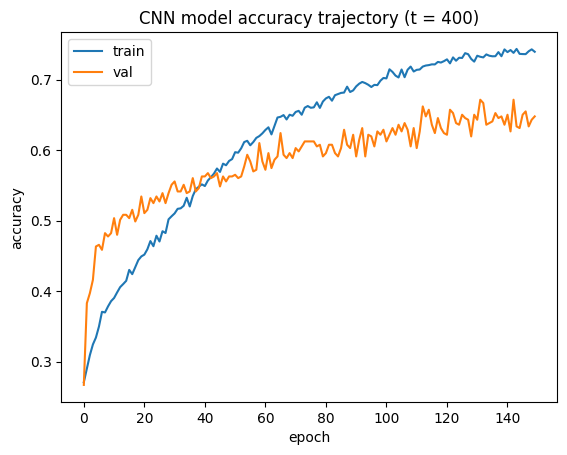

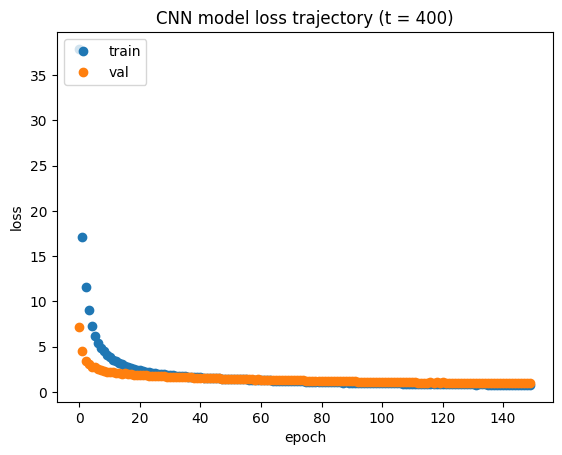

Test accuracy of the CNN model: 0.6930022835731506
(2115, 22, 1000)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 125, 22)           4862      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 62, 22)            0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 62, 22)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 62, 22)            4862      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 31, 22)            0         
 g1D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 31, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 38ms/step - loss: 34.3489 - accuracy: 0.2677 - val_loss: 6.5562 - val_accuracy: 0.3050
Epoch 2/150
16/16 [==============================] - 1s 34ms/step - loss: 15.8549 - accuracy: 0.3002 - val_loss: 4.5725 - val_accuracy: 0.3759
Epoch 3/150
16/16 [==============================] - 1s 33ms/step - loss: 10.2133 - accuracy: 0.3314 - val_loss: 3.3828 - val_accuracy: 0.4303
Epoch 4/150
16/16 [==============================] - 1s 33ms/step - loss: 7.9536 - accuracy: 0.3437 - val_loss: 2.9279 - val_accuracy: 0.4586
Epoch 5/150
16/16 [==============================] - 1s 46ms/step - loss: 6.5131 - accuracy: 0.3621 - val_loss: 2.6635 - val_accuracy: 0.4704
Epoch 6/150
16/16 [==============================] - 1s 39ms/step - loss: 5.6097 - accuracy: 0.3780 - val_loss: 2.5045 - val_accuracy: 0.4941
Epoch 7/150
16/16 [==============================] - 1s 41ms/step - loss: 4.9977 - accuracy: 0.3916 - val_loss: 2.5664 - val_accuracy: 0.4917
Epoch 8/150
16/

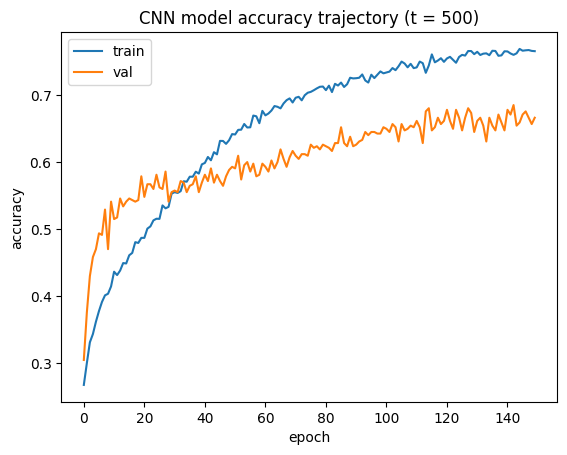

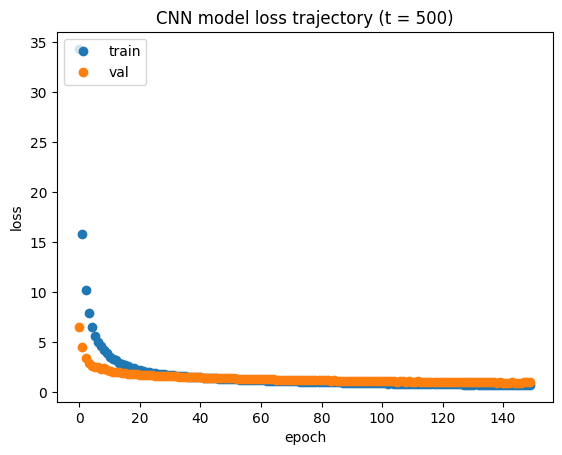

Test accuracy of the CNN model: 0.7065462470054626
(2115, 22, 1000)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 150, 22)           4862      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 75, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 75, 22)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 75, 22)            4862      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 37, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 37, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 51ms/step - loss: 31.1028 - accuracy: 0.2752 - val_loss: 6.2583 - val_accuracy: 0.3357
Epoch 2/150
16/16 [==============================] - 1s 47ms/step - loss: 14.8552 - accuracy: 0.3090 - val_loss: 4.8001 - val_accuracy: 0.3688
Epoch 3/150
16/16 [==============================] - 1s 47ms/step - loss: 9.6733 - accuracy: 0.3503 - val_loss: 3.6824 - val_accuracy: 0.4279
Epoch 4/150
16/16 [==============================] - 1s 46ms/step - loss: 7.3147 - accuracy: 0.3688 - val_loss: 3.2819 - val_accuracy: 0.4374
Epoch 5/150
16/16 [==============================] - 1s 45ms/step - loss: 6.0147 - accuracy: 0.3893 - val_loss: 2.6749 - val_accuracy: 0.4965
Epoch 6/150
16/16 [==============================] - 1s 48ms/step - loss: 5.2528 - accuracy: 0.3922 - val_loss: 2.5081 - val_accuracy: 0.5106
Epoch 7/150
16/16 [==============================] - 1s 42ms/step - loss: 4.6782 - accuracy: 0.4056 - val_loss: 2.4207 - val_accuracy: 0.5059
Epoch 8/150
16/1

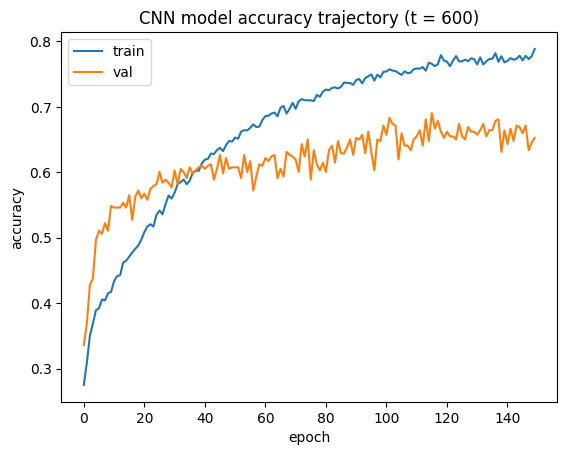

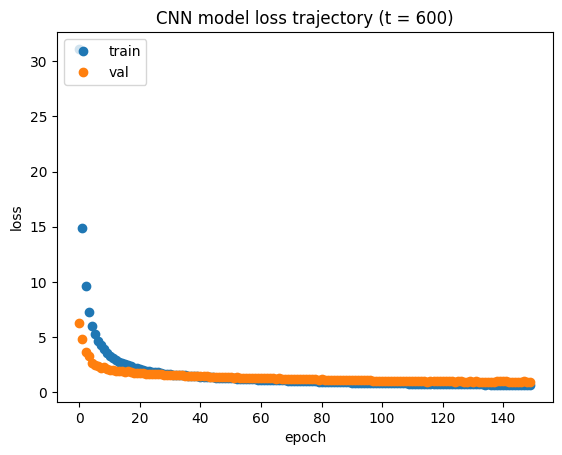

Test accuracy of the CNN model: 0.6862302422523499
(2115, 22, 1000)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 175, 22)           4862      
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 87, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 87, 22)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 87, 22)            4862      
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 43, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 43, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 46ms/step - loss: 31.7675 - accuracy: 0.2653 - val_loss: 5.8061 - val_accuracy: 0.3262
Epoch 2/150
16/16 [==============================] - 1s 43ms/step - loss: 14.7579 - accuracy: 0.3099 - val_loss: 5.0916 - val_accuracy: 0.3806
Epoch 3/150
16/16 [==============================] - 1s 54ms/step - loss: 9.7684 - accuracy: 0.3516 - val_loss: 3.5441 - val_accuracy: 0.4303
Epoch 4/150
16/16 [==============================] - 1s 43ms/step - loss: 7.5466 - accuracy: 0.3716 - val_loss: 3.1765 - val_accuracy: 0.4539
Epoch 5/150
16/16 [==============================] - 1s 45ms/step - loss: 6.3388 - accuracy: 0.3849 - val_loss: 2.8481 - val_accuracy: 0.4799
Epoch 6/150
16/16 [==============================] - 1s 45ms/step - loss: 5.5751 - accuracy: 0.3980 - val_loss: 2.6492 - val_accuracy: 0.4917
Epoch 7/150
16/16 [==============================] - 1s 43ms/step - loss: 4.9027 - accuracy: 0.4051 - val_loss: 2.4954 - val_accuracy: 0.4988
Epoch 8/150
16/1

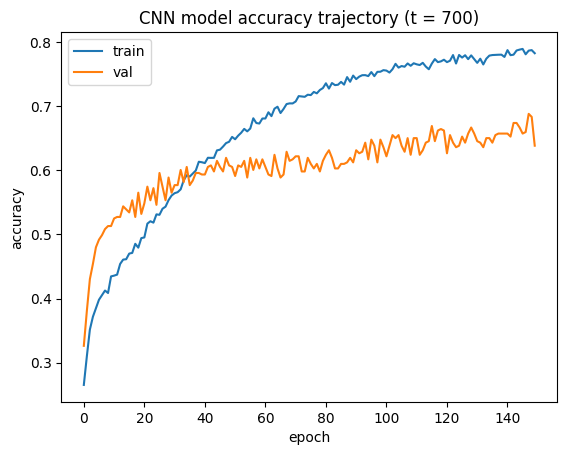

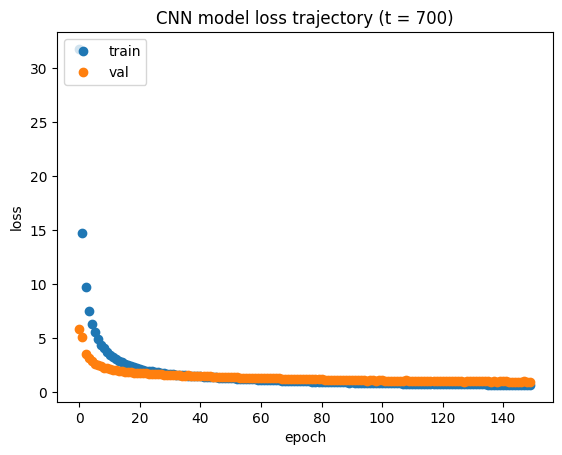

Test accuracy of the CNN model: 0.7133182883262634
(2115, 22, 1000)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 2s 68ms/step - loss: 33.7293 - accuracy: 0.2740 - val_loss: 5.9391 - val_accuracy: 0.3475
Epoch 2/150
16/16 [==============================] - 1s 60ms/step - loss: 15.5007 - accuracy: 0.3174 - val_loss: 4.5492 - val_accuracy: 0.4255
Epoch 3/150
16/16 [==============================] - 1s 57ms/step - loss: 10.6231 - accuracy: 0.3487 - val_loss: 3.9474 - val_accuracy: 0.4681
Epoch 4/150
16/16 [==============================] - 1s 54ms/step - loss: 8.0293 - accuracy: 0.3788 - val_loss: 3.4736 - val_accuracy: 0.4657
Epoch 5/150
16/16 [==============================] - 1s 52ms/step - loss: 6.6721 - accuracy: 0.3954 - val_loss: 3.0668 - val_accuracy: 0.4988
Epoch 6/150
16/16 [==============================] - 1s 52ms/step - loss: 5.6615 - accuracy: 0.4070 - val_loss: 2.7633 - val_accuracy: 0.5130
Epoch 7/150
16/16 [==============================] - 1s 52ms/step - loss: 5.1233 - accuracy: 0.4105 - val_loss: 2.5810 - val_accuracy: 0.4941
Epoch 8/150
16/

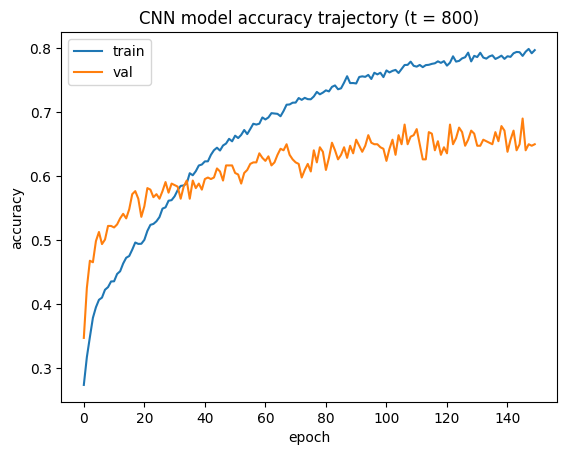

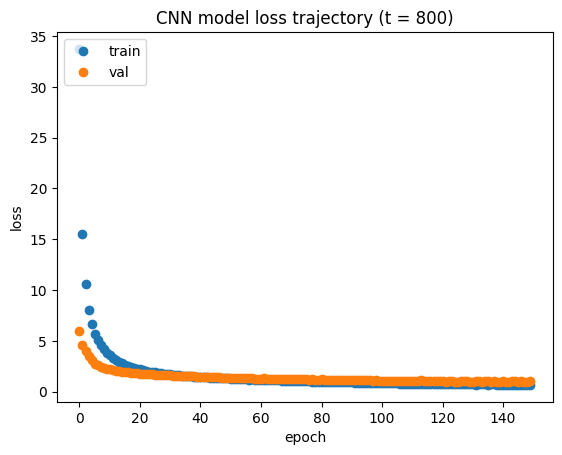

Test accuracy of the CNN model: 0.6636568903923035
(2115, 22, 1000)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_17 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 56ms/step - loss: 34.7660 - accuracy: 0.2592 - val_loss: 6.4138 - val_accuracy: 0.3121
Epoch 2/150
16/16 [==============================] - 1s 52ms/step - loss: 15.9763 - accuracy: 0.3047 - val_loss: 5.2765 - val_accuracy: 0.4043
Epoch 3/150
16/16 [==============================] - 1s 58ms/step - loss: 10.9512 - accuracy: 0.3316 - val_loss: 3.7322 - val_accuracy: 0.4326
Epoch 4/150
16/16 [==============================] - 1s 54ms/step - loss: 7.9930 - accuracy: 0.3715 - val_loss: 3.2397 - val_accuracy: 0.4539
Epoch 5/150
16/16 [==============================] - 1s 59ms/step - loss: 6.5448 - accuracy: 0.3863 - val_loss: 2.9208 - val_accuracy: 0.4492
Epoch 6/150
16/16 [==============================] - 1s 53ms/step - loss: 5.6642 - accuracy: 0.3998 - val_loss: 2.8647 - val_accuracy: 0.4775
Epoch 7/150
16/16 [==============================] - 1s 50ms/step - loss: 5.0767 - accuracy: 0.4051 - val_loss: 2.5259 - val_accuracy: 0.4846
Epoch 8/150
16/

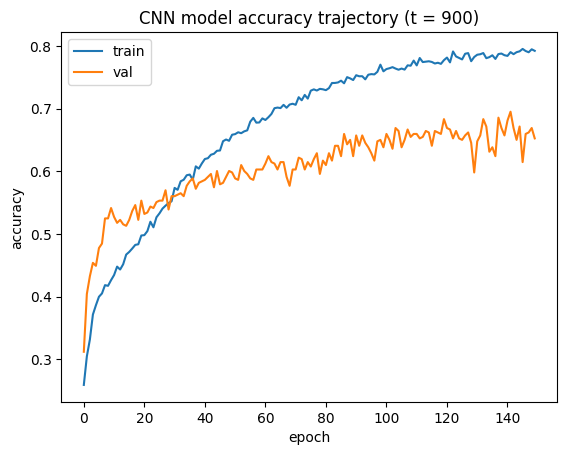

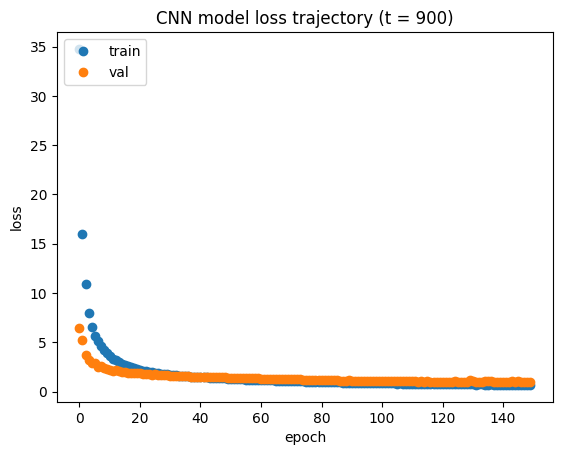

Test accuracy of the CNN model: 0.6930022835731506
(2115, 22, 1000)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_19 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 59ms/step - loss: 33.6823 - accuracy: 0.2587 - val_loss: 6.5505 - val_accuracy: 0.2648
Epoch 2/150
16/16 [==============================] - 1s 51ms/step - loss: 14.9181 - accuracy: 0.2891 - val_loss: 4.2911 - val_accuracy: 0.3783
Epoch 3/150
16/16 [==============================] - 1s 50ms/step - loss: 9.7338 - accuracy: 0.3288 - val_loss: 3.3344 - val_accuracy: 0.4184
Epoch 4/150
16/16 [==============================] - 1s 55ms/step - loss: 7.5731 - accuracy: 0.3481 - val_loss: 2.8186 - val_accuracy: 0.4941
Epoch 5/150
16/16 [==============================] - 1s 62ms/step - loss: 6.2274 - accuracy: 0.3723 - val_loss: 2.6402 - val_accuracy: 0.4823
Epoch 6/150
16/16 [==============================] - 1s 55ms/step - loss: 5.3179 - accuracy: 0.3956 - val_loss: 2.5906 - val_accuracy: 0.4799
Epoch 7/150
16/16 [==============================] - 1s 49ms/step - loss: 4.8093 - accuracy: 0.4035 - val_loss: 2.4769 - val_accuracy: 0.5130
Epoch 8/150
16/1

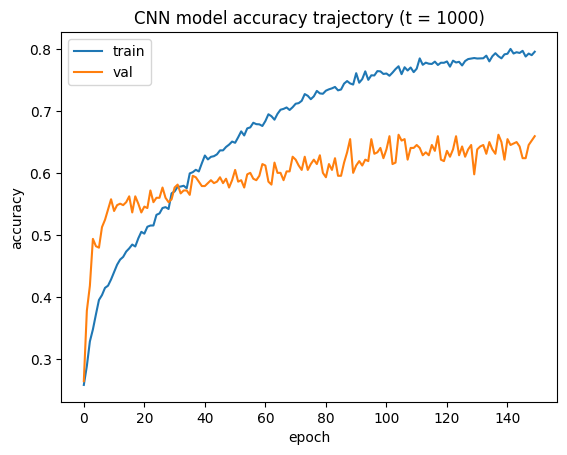

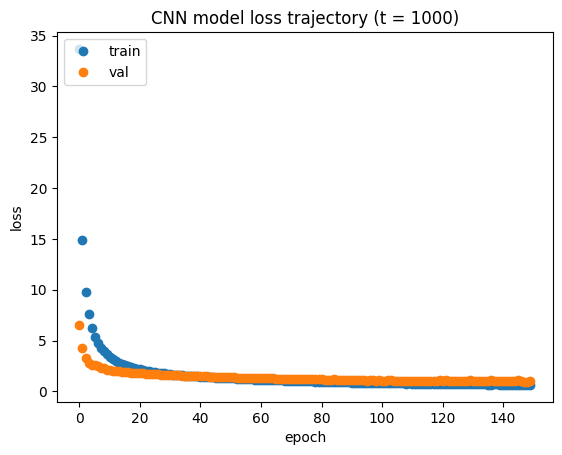

Test accuracy of the CNN model: 0.6930022835731506


In [2]:
for i in np.arange(1, 11):
    # Load original data
    X_test = np.load("../ECEC147project-data/X_test.npy")
    y_test = np.load("../ECEC147project-data//y_test.npy")
    person_train_valid = np.load("../ECEC147project-data//person_train_valid.npy")
    X_train_valid = np.load("../ECEC147project-data/X_train_valid.npy")
    print(X_train_valid.shape)
    y_train_valid = np.load("../ECEC147project-data/y_train_valid.npy")
    person_test = np.load("../ECEC147project-data/person_test.npy")


    X_test_slice = X_test[:,:,0:i*100]
    X_train_valid_slice = X_train_valid[:,:,0:i*100]

    data = dict()
    data['X_train_valid'] = X_train_valid_slice
    data['y_train_valid'] = y_train_valid
    data['X_test'] = X_test_slice
    data['y_test'] = y_test
    data['person_train_valid'] = person_train_valid
    data['person_test'] = person_test
    preprocessed_data = preprocess_data(data)

    # Load preprocessed data
    X_train = preprocessed_data['total_X_train']
    y_train = preprocessed_data['total_y_train']
    X_val = preprocessed_data['total_X_val']
    y_val = preprocessed_data['total_y_val']
    X_test = preprocessed_data['total_X_test']
    y_test = preprocessed_data['total_y_test']
    X_train = np.transpose(X_train, (0, 2, 1))
    X_val = np.transpose(X_val, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


    # Model Architecture
    CNN = Sequential()

    CNN.add(Conv1D(22, 10, input_shape=(X_train.shape[1], X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN.add(MaxPooling1D(2))
    CNN.add(Dropout(0.5))
    CNN.add(Conv1D(22, 10, input_shape=(X_train.shape[1]/2, X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN.add(MaxPooling1D(2))
    CNN.add(Dropout(0.5))
    CNN.add(Flatten())
    CNN.add(Dense(64))
    CNN.add(Dropout(0.5))
    CNN.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

    CNN.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    CNN.summary()


    CNN_results = CNN.fit(X_train, y_train, epochs=150, batch_size=640, validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[])

    # Plotting accuracy trajectory
    plt.plot(CNN_results.history['accuracy'])
    plt.plot(CNN_results.history['val_accuracy'])
    plt.title('CNN model accuracy trajectory (t = {})'.format(i*100))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot(CNN_results.history['loss'],'o')
    plt.plot(CNN_results.history['val_loss'],'o')
    plt.title('CNN model loss trajectory (t = {})'.format(i*100))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    ## Testing the model
    CNN_score = CNN.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy of the CNN model:',CNN_score[1])

